# Linear Regression Diagnostics

## Load data and split it into train and test

In [19]:
# Import Packages
import pandas as pd

# Load data
data = pd.read_csv('Iris.csv')

# Onehot encode the Categorical variables
data_onehot = pd.get_dummies(data, columns = ['Species']).drop('Id', axis=1)

# Get X and y variables
X=data_onehot.drop(['SepalLengthCm'], axis=1)
y=data_onehot['SepalLengthCm']

# Import Packages
from sklearn.model_selection import train_test_split

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Instantiate Linear Regression Model

In [2]:
# Import Packages
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols


# Instantiate the linear model
reg = LinearRegression()


#fit multiple linear regression model
data_onehot.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm','Setosa', 'Versicolor','Virginica']
model = ols('SepalLengthCm ~ SepalWidthCm + PetalLengthCm + PetalWidthCm + Setosa + Versicolor + Virginica', data=data_onehot).fit()


## Homoscedasticity and Normality Diagnostics : Residual plot and QQ plot

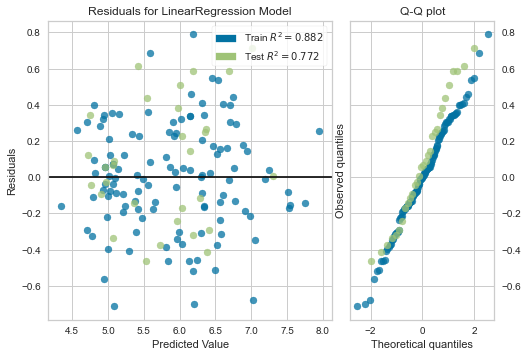

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [3]:
# Load packages
from yellowbrick.regressor import ResidualsPlot

reg_model_diagnostics = ResidualsPlot(reg, hist=False, qqplot=True)
reg_model_diagnostics.fit(X_train, y_train)  # Fit the training data to the visualizer
reg_model_diagnostics.score(X_test, y_test)  # Evaluate the model on the test data
reg_model_diagnostics.show()                 # Finalize and render the figure

## Homoscedasticity Diagnostics: Breusch-Pagan test

In [4]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 7.6401394233733715),
 ('p-value', 0.2656704682339448),
 ('f-value', 1.545632417044384),
 ('f p-value', 0.1793483089168524)]

## Multicollinearity - VIF

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_train_ = add_constant(X_train)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_train_.values, i) for i in range(X_train_.shape[1])]
vif['Features'] = X_train_.columns
vif

c:\Users\U344377\Anaconda3\envs\nlpvis\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
c:\Users\U344377\Anaconda3\envs\nlpvis\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,Features
0,0.000000,const
1,2.066800,SepalWidthCm
2,24.527359,PetalLengthCm
3,23.508625,PetalWidthCm
4,inf,Species_Iris-setosa
5,inf,Species_Iris-versicolor
6,inf,Species_Iris-virginica


## Correlation plot

In [6]:
# correlation plot
corr = X_train.corr()
corr.style.background_gradient(cmap='coolwarm')

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
SepalWidthCm,1.000000,-0.377609,-0.325408,0.563416,-0.451999,-0.114454
PetalLengthCm,-0.377609,1.000000,0.968138,-0.919079,0.150397,0.749167
PetalWidthCm,-0.325408,0.968138,1.000000,-0.890484,0.080722,0.788144
Species_Iris-setosa,0.563416,-0.919079,-0.890484,1.000000,-0.463289,-0.527970
Species_Iris-versicolor,-0.451999,0.150397,0.080722,-0.463289,1.000000,-0.508021
Species_Iris-virginica,-0.114454,0.749167,0.788144,-0.527970,-0.508021,1.000000


## Autocorrelation: Durbin-Watson test

In [7]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(model.resid)

1.9623754127498167

## Influential points and outliers: Leverage Plots

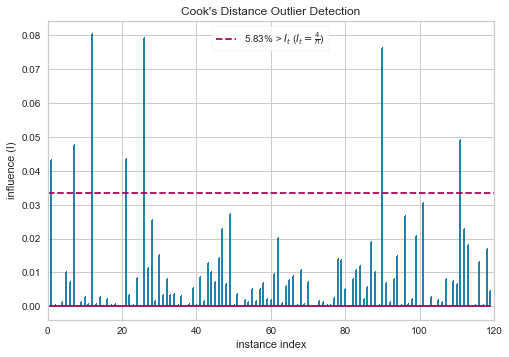

<AxesSubplot:title={'center':"Cook's Distance Outlier Detection"}, xlabel='instance index', ylabel='influence (I)'>

In [8]:
from yellowbrick.regressor import CooksDistance

# Instantiate and fit the leverage
leverage = CooksDistance()
leverage.fit(X_train, y_train)
leverage.show()

# Bias-Variance

In [21]:
# Bias
from sklearn.metrics import mean_squared_error
reg.fit(X_train, y_train)

# Preict test and train
y_train_predicted = reg.predict(X_train)
y_test_predicted = reg.predict(X_test)

# Compute training and testing errors
training_error = mean_squared_error(y_train,y_train_predicted)
test_error = mean_squared_error(y_test,y_test_predicted)

print('Training_error: %.4f' % training_error)
print('Test_error: %.4f' % test_error)

Training_error: 0.0847
Test_error: 0.1160


In [9]:
from mlxtend.evaluate import bias_variance_decomp
# estimate bias and variance
mse, bias, var = bias_variance_decomp(reg, X_train.values, y_train.values, X_test.values, y_test.values, loss='mse', num_rounds=200, random_seed=1)
# summarize results
print('MSE: %.4f' % mse)
print('Bias: %.4f' % bias)
print('Variance: %.4f' % var)


MSE: 0.1212
Bias: 0.1163
Variance: 0.0049
